In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
def str_to_bin(str_ctd, small_flag):
    if small_flag == 1:
        if str_ctd < 20: return 1
        else: return 0
    elif small_flag == 0:
        if str_ctd > 25: return 1
        else: return 0
    else:
        if str_ctd >= 20 and str_ctd <= 25: return 1
        else: return 0

def lm_func(str_ctd, const, b1, b2):
    str_s = str_to_bin(str_ctd, 1)
    str_l = str_to_bin(str_ctd, 0)
    return const + b1*str_s + b2*str_l

lm_func_v = np.vectorize(lm_func)

In [3]:
# data = pd.read_csv('F:\\workspace\\ipython\\caschool.csv', usecols=['testscr', 'str'])
data = pd.read_csv("https://raw.githubusercontent.com/gerald-liu/ipython/master/ECON3334/caschool.csv",
                   usecols=['testscr', 'str'])
data['str_s'] = data['str'].apply(str_to_bin, args=(1, ))
data['str_l'] = data['str'].apply(str_to_bin, args=(0, ))

In [7]:
lm = smf.ols(formula='testscr ~ str_s + str_l', data=data).fit()
# summary = pd.DataFrame({'Coefficient':lm.params, 'SE':lm.bse, 't-stat':lm.tvalues, 'p-value':lm.pvalues})
summary = lm.summary().tables[1]
print(summary)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    650.0277      1.401    464.023      0.000     647.274     652.781
str_s          7.3236      1.854      3.950      0.000       3.679      10.968
str_l         -2.9610     10.911     -0.271      0.786     -24.409      18.487


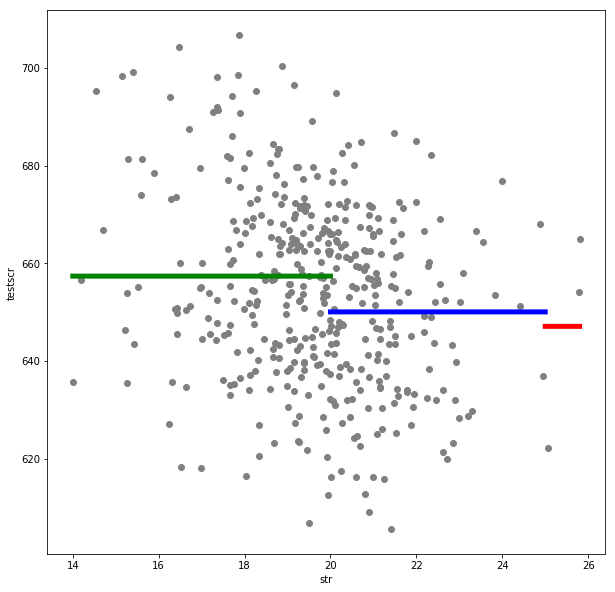

In [8]:
str_ctd = []
testscr_ctd = []
str_ctd.append(np.linspace(data['str'].min(), 20, num=10000, endpoint=False))
str_ctd.append(np.linspace(20, 25, 10000))
str_ctd.append(np.linspace(data['str'].max(), 25, num=10000, endpoint=False))

for i in range(0, 3):
    testscr_ctd.append(lm_func_v(str_ctd[i], lm.params[0], lm.params[1], lm.params[2]))

plt.figure(figsize=(10,10))
plt.scatter(data['str'], data['testscr'], color='grey')
plt.plot(str_ctd[0], testscr_ctd[0], color='green', linewidth=5)
plt.plot(str_ctd[1], testscr_ctd[1], color='blue', linewidth=5)
plt.plot(str_ctd[2], testscr_ctd[2], color='red', linewidth=5)
plt.xlabel('str')
plt.ylabel('testscr')
plt.savefig("hw4_8.3.png")

In [ ]:
# data = data.sample(frac=1).reset_index(drop=True)
# test_size = (int)(round(data.shape[0] * 0.2))
# str_bin_train_0 = data[['str_s', 'str_l']][test_size:]
# testscr_train_0 = data['testscr'][test_size:]
# str_bin_test_0 = data[['str_s', 'str_l']][:test_size]
# testscr_test_0 = data['testscr'][:test_size]

# data['str_m'] = data['str'].apply(str_to_bin, args=(2, ))
# str_bin_train_1 = data['str_s'][test_size:]
# testscr_train_1 = data['testscr'][test_size:]

# str_bin_train_1 = sm.add_constant(str_bin_train_1)
# lm_1 = sm.OLS(testscr_train_1, str_bin_train_1).fit()

# summary_1 = pd.DataFrame({'Coefficient':lm_1.params, 'SE':lm_1.bse, 't-stat':lm_1.tvalues, 'p-value':lm_1.pvalues})
# print(summary_1)

# str_bin_test_1 = data['str_s'][:test_size]
# testscr_test_1 = data['testscr'][:test_size]
# str_bin_test_1 = sm.add_constant(str_bin_test_1)
# testscr_pred_1 = lm_1.predict(str_bin_test_1)

# # Plot outputs
# f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))

# ax1.scatter(data['str'][test_size:], testscr_train_0,  color='black')
# ax1.scatter(data['str'][test_size:], train_pred, color='blue')

# ax2.scatter(data['str'][:test_size], testscr_test_0,  color='black')
# ax2.scatter(data['str'][:test_size], test_pred, color='blue')

# plt.xlabel('str')
# plt.ylabel('testscr')
# plt.xticks() # hide xticks: plt.xticks(())
# plt.yticks()
# plt.show()